In [2]:
import numpy as np
import pandas as pd
import rebound
import os
import matplotlib.pyplot as plt

DEEP = pd.read_csv('DEEP_data.csv')
print(DEEP)

     Name       smas      eccs       incs        aops        lans  \
0       0  42.659899  0.013843   1.272091  279.337148   88.459643   
1       1  52.309839  0.284183   9.713581  320.854218    1.318710   
2       2  47.660344  0.166231   4.292853   37.266988   38.863942   
3       3  43.019180  0.009191   1.538734  202.322518  164.594366   
4       4  43.054385  0.011201   1.250663  208.433168  167.632907   
..    ...        ...       ...        ...         ...         ...   
105   105  44.357660  0.097078   4.072215   97.330993  156.161224   
106   106  43.002902  0.049623   1.418747  262.595465   38.700039   
107   107  43.950007  0.013910   3.255314  331.095144   99.188900   
108   108  43.160156  0.083105  21.161965   47.844693  358.543466   
109   109  44.373268  0.071761   3.180655  180.079743   37.136257   

             Tps      epoch  
0    2033.536947  2458725.5  
1    2003.035372  2458725.5  
2    2078.919642  2458725.5  
3    2031.088725  2458725.5  
4    2038.641589  245

In [69]:

import os
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')
print('Sim made')
#msun = msun/SS_GM[0]
radius = 695700.*6.68459e-9
sim.add(m=1,r=radius,x=0.,y=0.,z=0.,vx=0.,vy=0.,vz=0.,hash='sun')
for i in range(len(DEEP)):
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun')
    #print('Sim made')
    #msun = msun/SS_GM[0]
    radius = 695700.*6.68459e-9
    sim.add(m=1,r=radius,x=0.,y=0.,z=0.,vx=0.,vy=0.,vz=0.,hash='sun')
    sim.add(m=0,a=DEEP['smas'][i], e=DEEP['eccs'][i], inc=DEEP['incs'][i], Omega=DEEP['lans'][i], omega=DEEP['aops'][i])
    array = np.array([1,sim.particles[1].x,sim.particles[1].y,sim.particles[1].z,sim.particles[1].vx,sim.particles[1].vy,sim.particles[1].vz])
    print(array)
    horizon_data = pd.DataFrame(columns=['flag','sbx','sby','sbz','sbvx','sbvy','sbvz'])
    
    horizon_data['flag'] = [array[0]]
    horizon_data['sbx'] = array[1]
    horizon_data['sby'] = array[2]
    horizon_data['sbz'] = array[3]
    horizon_data['sbvx'] = array[4]
    horizon_data['sbvy'] = array[5]
    horizon_data['sbvz'] = array[6]
    horizon_data['epoch'] = 2458725.5
    print(horizon_data)
    filename = '../Sims/DEEP/'+str(DEEP['Name'][i])
    if not os.path.isdir(filename):
        os.mkdir(filename)
    horizon_data.to_csv(filename+'/horizon_data.csv')

Sim made
[  1.         -37.26856354 -16.44151367  10.51484667  -0.09284033
  -0.36497077  -0.89974663]
   flag        sbx        sby        sbz     sbvx      sbvy      sbvz  \
0   1.0 -37.268564 -16.441514  10.514847 -0.09284 -0.364971 -0.899747   

       epoch  
0  2458725.5  
[ 1.         22.47050303 29.64678479 -4.26817782  0.87368986 -0.70592681
 -0.30369159]
   flag        sbx        sby       sbz     sbvx      sbvy      sbvz  \
0   1.0  22.470503  29.646785 -4.268178  0.87369 -0.705927 -0.303692   

       epoch  
0  2458725.5  
[ 1.          8.02220576 35.82907255 15.19891908  0.54380029  0.25691659
 -0.89266616]
   flag       sbx        sby        sbz    sbvx      sbvy      sbvz      epoch
0   1.0  8.022206  35.829073  15.198919  0.5438  0.256917 -0.892666  2458725.5
[ 1.          3.10281904 12.70263925 40.56851691 -0.31529209 -0.8650248
  0.29496746]
   flag       sbx        sby        sbz      sbvx      sbvy      sbvz  \
0   1.0  3.102819  12.702639  40.568517 -0.315292 -0.8

[  1.          10.80457239 -24.05919172 -25.60162796  -0.59718272
  -0.76991665   0.47150394]
   flag        sbx        sby        sbz      sbvx      sbvy      sbvz  \
0   1.0  10.804572 -24.059192 -25.601628 -0.597183 -0.769917  0.471504   

       epoch  
0  2458725.5  
[  1.         -20.9489137   31.5504827   14.2087111    0.15589476
   0.49752857  -0.87491685]
   flag        sbx        sby        sbz      sbvx      sbvy      sbvz  \
0   1.0 -20.948914  31.550483  14.208711  0.155895  0.497529 -0.874917   

       epoch  
0  2458725.5  
[ 1.00000000e+00 -1.86834362e+01 -2.78957093e+01 -8.98300176e+00
  4.99920247e-01 -1.67337633e-02 -9.87802081e-01]
   flag        sbx        sby       sbz     sbvx      sbvy      sbvz  \
0   1.0 -18.683436 -27.895709 -8.983002  0.49992 -0.016734 -0.987802   

       epoch  
0  2458725.5  
[  1.          25.74838387 -28.03648026  15.63937797   0.78810856
   0.52056175  -0.36432411]
   flag        sbx       sby        sbz      sbvx      sbvy      sbvz 

25
Sim made
Sims/DEEP/1


FileNotFoundError: [Errno 2] No such file or directory: 'Sims/DEEP/1/horizon_data.csv'

In [49]:
import sys
sys.path.insert(0, '../../src')
import horizons_api
plan_vals = np.zeros((1,64))
plan_cols = []
for i in range(8):
   plan_cols.append('mass_'+str(i+1))
   plan_cols.append('radius_'+str(i+1))
   plan_cols.append('x_'+str(i+1))
   plan_cols.append('y_'+str(i+1))
   plan_cols.append('z_'+str(i+1))
   plan_cols.append('vx_'+str(i+1))
   plan_cols.append('vy_'+str(i+1))
   plan_cols.append('vz_'+str(i+1))
    
horizon_planets = pd.DataFrame(plan_vals, columns=plan_cols)
planet_id = {1: 'mercury', 2: 'venus', 3:'earth', 4:'mars', 5: 'jupiter', 6 : 'saturn', 7 : 'uranus', 8 : 'neptune'}
    
#print(astdys)
for i in range(len(DEEP)):
    filename = '../Sims/DEEP/'+str(DEEP['Name'][i])
    epoch = DEEP['epoch'][i]
    #for i in range(len(objects)):
    #for i in arange:
        #print(i)
    objname = str(DEEP['Name'].iloc[i])
    notplanets = [1,2,3,4]
    planets = [5,6,7,8]
                    
    for pl in notplanets:
        flag, mass, radius, [x, y, z], [vx, vy, vz] = horizons_api.query_horizons_planets(obj=planet_id[pl],epoch=epoch)
        horizon_planets['mass_'+str(pl)] = mass
        horizon_planets['radius_'+str(pl)] = radius
        horizon_planets['x_'+str(pl)] = x
        horizon_planets['y_'+str(pl)] = y
        horizon_planets['z_'+str(pl)] = z
        horizon_planets['vx_'+str(pl)] = vx
        horizon_planets['vy_'+str(pl)] = vy
        horizon_planets['vz_'+str(pl)] = vz
    for pl in planets:
        flag, mass, radius, [x, y, z], [vx, vy, vz] = horizons_api.query_horizons_planets(obj=planet_id[pl], epoch=epoch)
        horizon_planets['mass_'+str(pl)] = mass
        horizon_planets['radius_'+str(pl)] = radius
        horizon_planets['x_'+str(pl)] = x
        horizon_planets['y_'+str(pl)] = y
        horizon_planets['z_'+str(pl)] = z
        horizon_planets['vx_'+str(pl)] = vx
        horizon_planets['vy_'+str(pl)] = vy
        horizon_planets['vz_'+str(pl)] = vz
    
    horizon_planets.to_csv(filename+'/horizon_planets.csv')
        

      Name        sma   obs_ecc  obs_sinI  calc_ecc  calc_sinI  ast_ecc  \
0      0.0  42.567011  0.012670 -0.041688  0.012670   0.952652      0.0   
1      1.0  51.886585  0.281065  0.392072  0.281065   0.276240      0.0   
2      2.0  47.412634  0.162041  0.669679  0.162041   0.914730      0.0   
3      3.0  43.067543  0.009921  0.096567  0.009921   0.999427      0.0   
4      4.0  42.817795  0.005631  0.128184  0.005631   0.951718      0.0   
..     ...        ...       ...       ...       ...        ...      ...   
105  105.0  44.428714  0.099443  0.431862  0.099443   0.807371      0.0   
106  106.0  43.159934  0.053020 -0.590393  0.053020   0.987804      0.0   
107  107.0  43.788647  0.009052  0.512851  0.009052   0.146980      0.0   
108  108.0  43.055346  0.082318  0.903130  0.082318   0.726080      0.0   
109  109.0  44.339509  0.069259 -0.216240  0.069259   0.074494      0.0   

     ast_sinI  megno  lyapunov  
0         0.0    0.0       0.0  
1         0.0    0.0       0.0  


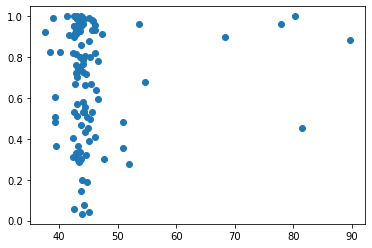

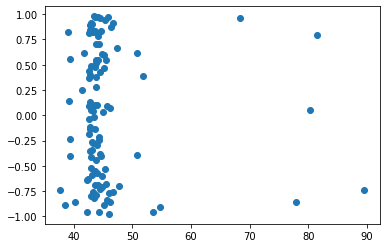

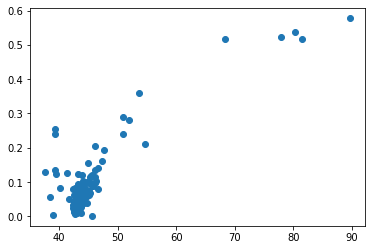

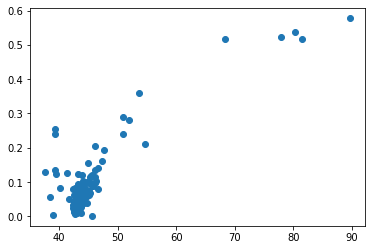

In [71]:
import matplotlib.pyplot as plt
Distant_pe = pd.read_csv('prop_elem_DEEP.csv',index_col=0)
print(Distant_pe)
plt.scatter(Distant_pe['sma'],Distant_pe['calc_sinI'])
plt.show()
plt.scatter(Distant_pe['sma'],Distant_pe['obs_sinI'])
plt.show()
plt.scatter(Distant_pe['sma'],Distant_pe['calc_ecc'])
plt.show()
plt.scatter(Distant_pe['sma'],Distant_pe['obs_ecc'])
plt.show()

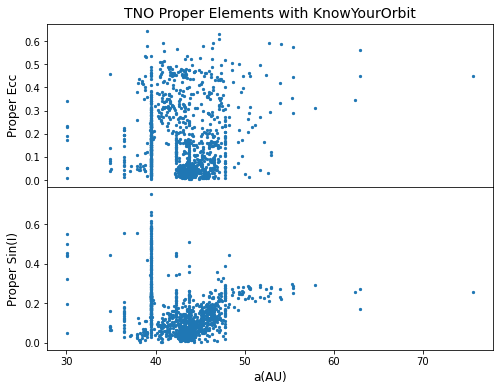

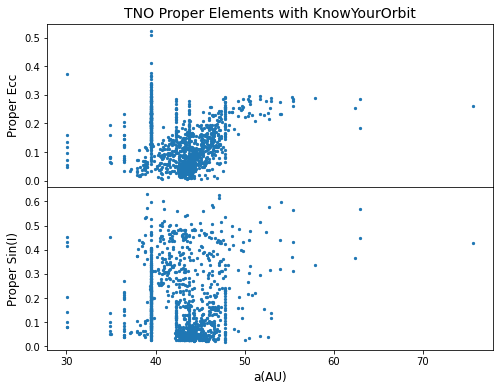

In [110]:
catalog = pd.read_csv('TNOs_data.csv')
TNOs = pd.read_csv('prop_elem_tnos_multi_ident.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],TNOs['calc_ecc'][ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('TNO Proper Elements with KnowYourOrbit',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],TNOs['calc_sinI'][ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
#ax[1].set_xlim(29,60)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

catalog = pd.read_csv('TNOs_data.csv')
TNOs = pd.read_csv('prop_elem_TNOs.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],TNOs['calc_ecc'][ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('TNO Proper Elements with KnowYourOrbit',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],TNOs['calc_sinI'][ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
#ax[1].set_xlim(29,60)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

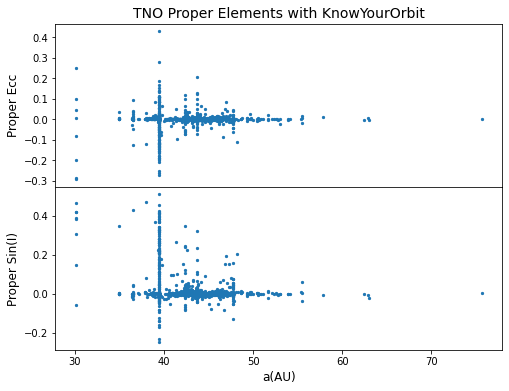

2.1125149022714247
8.594642918899774


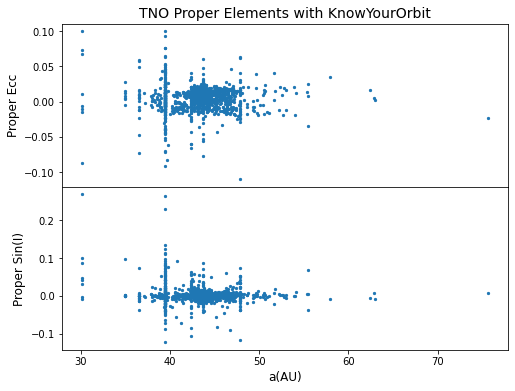

0.7241961784398567
0.41877736431853996


In [120]:
catalog = pd.read_csv('TNOs_data.csv')
TNOs = pd.read_csv('prop_elem_tnos_multi_sec_few.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],(TNOs['calc_ecc']-TNOs['ast_ecc'])[ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('TNO Proper Elements with KnowYourOrbit',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],(TNOs['calc_sinI']-TNOs['ast_sinI'])[ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
#ax[1].set_xlim(29,60)
#ax[0].set_ylim(-0.1,0.1)
#ax[1].set_ylim(-0.1,0.1)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

print(np.sum((TNOs['calc_ecc']-astecc)[ind]**2))
print(np.sum((TNOs['calc_sinI']-astsini)[ind]**2))

astecc = TNOs['ast_ecc']
astsini = TNOs['ast_sinI']
catalog = pd.read_csv('TNOs_data.csv')
TNOs = pd.read_csv('prop_elem_TNOs.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],(TNOs['calc_sinI']-astecc)[ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('TNO Proper Elements with KnowYourOrbit',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],(TNOs['calc_ecc']-astsini)[ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
#ax[1].set_xlim(29,60)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

print(np.sum((TNOs['calc_ecc']-astsini)[ind]**2))
print(np.sum((TNOs['calc_sinI']-astecc)[ind]**2))

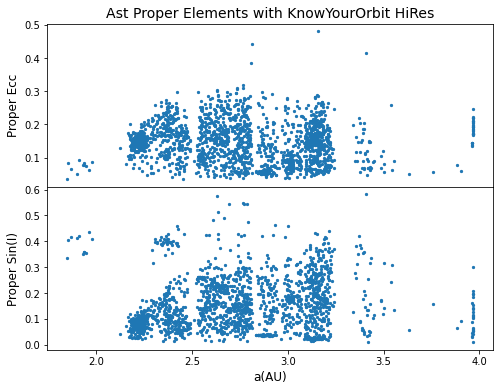

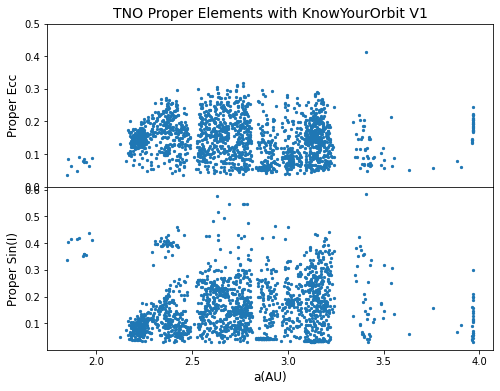

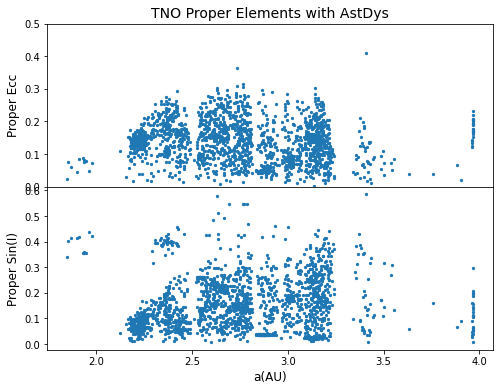

In [9]:
catalog = pd.read_csv('AstFam_data.csv')
TNOs = pd.read_csv('prop_elem_astfam_multi_sec_hires.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],TNOs['calc_ecc'][ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('Ast Proper Elements with KnowYourOrbit HiRes',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],TNOs['calc_sinI'][ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
#ax[1].set_xlim(29,60)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

catalog = pd.read_csv('AstFam_data.csv')
TNOs = pd.read_csv('prop_elem_AstFam.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],TNOs['calc_ecc'][ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('TNO Proper Elements with KnowYourOrbit V1',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],TNOs['calc_sinI'][ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
ax[0].set_ylim(0,0.5)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

catalog = pd.read_csv('AstFam_data.csv')
TNOs = pd.read_csv('prop_elem_AstFam.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],catalog['e'][ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('TNO Proper Elements with AstDys',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],catalog['sinI'][ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
ax[0].set_ylim(0,0.5)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

      Name   mag.     a(AU)         e      sinI   n(deg/yr)    g("/yr)  \
0        1   3.44  2.767092  0.115350  0.167737   78.194564  54.251351   
1        2   4.11  2.770601  0.280881  0.547176   78.055664  -1.285104   
2        3   5.37  2.669387  0.233766  0.229454   82.528341  43.850318   
3        4   3.41  2.361512  0.099826  0.111464   99.188842  36.872740   
4        5   6.94  2.576956  0.185096  0.079498   87.008230  52.448383   
...    ...    ...       ...       ...       ...         ...        ...   
1913  1996  11.70  2.558690  0.099192  0.255072   87.945321  38.341748   
1914  1997  13.28  2.209317  0.150497  0.102937  109.614199  32.163892   
1915  1998  12.35  2.418512  0.077555  0.135264   95.702782  37.496283   
1916  1999  11.02  3.116027  0.145875  0.199784   65.428003  92.681331   
1917  2000  11.21  2.380540  0.268789  0.397127   98.004263  18.096703   

        s("/yr)  LCEx1E6  My  Unnamed: 10  
0    -59.251439    185.2 -10          NaN  
1    -46.519068     10.

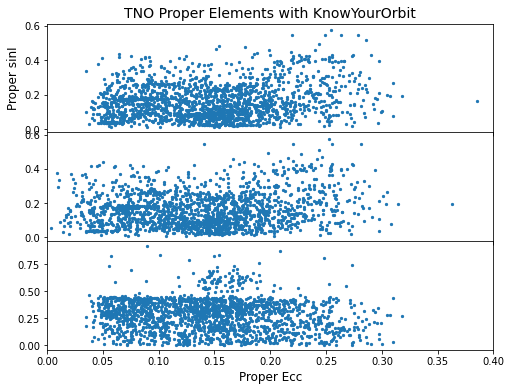

In [155]:
catalog = pd.read_csv('AstFam_new_data.csv')
print(catalog)
print(TNOs)
TNOs = pd.read_csv('prop_elem_AstFam.csv')
TNOs = pd.read_csv('prop_elem_astfam_multi_sec_hires.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(3,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(TNOs['calc_ecc'][ind],TNOs['calc_sinI'][ind],s=5)
ax[1].scatter(TNOs['ast_ecc'][ind],TNOs['ast_sinI'][ind],s=5)
ax[2].scatter(TNOs['obs_ecc'][ind],abs(TNOs['obs_sinI'][ind]),s=5)
#ax[0].xlabel('a(AU)')
ax[2].set_xlabel('Proper Ecc',fontsize=12)
ax[0].set_ylabel('Proper sinI',fontsize=12)
ax[0].set_title('TNO Proper Elements with KnowYourOrbit',fontsize=14)
ax[0].set_xlim(0,0.4)
plt.show()

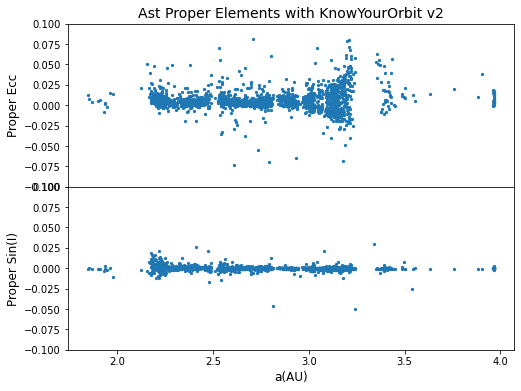

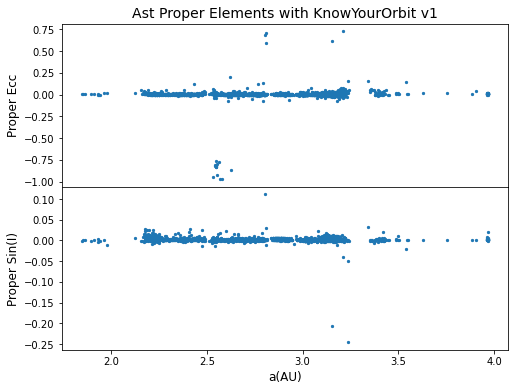

23.661319268459224
34.74810268372231


In [36]:
catalog = pd.read_csv('AstFam_new_data.csv')
TNOs = pd.read_csv('prop_elem_astfam_multi_sec_hires.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],(TNOs['calc_ecc']-TNOs['ast_ecc'])[ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('Ast Proper Elements with KnowYourOrbit v2',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],(TNOs['calc_sinI']-TNOs['ast_sinI'])[ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
#ax[1].set_xlim(29,60)
ax[0].set_ylim(-0.1,0.1)
ax[1].set_ylim(-0.1,0.1)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

#print(np.sum((TNOs['calc_ecc']-astecc)[ind]**2))
#print(np.sum((TNOs['calc_sinI']-astsini)[ind]**2))

astecc = TNOs['ast_ecc']
astsini = TNOs['ast_sinI']
catalog = pd.read_csv('AstFam_new_data.csv')
TNOs = pd.read_csv('prop_elem_AstFam.csv')
ind = np.where(TNOs['calc_ecc'] != 0)[0]
#print(TNOs)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,6))
fig.subplots_adjust(hspace=0)
ax[0].scatter(catalog['a(AU)'][ind],(TNOs['calc_ecc']-astecc)[ind],s=5)
#ax[0].xlabel('a(AU)')
ax[0].set_ylabel('Proper Ecc',fontsize=12)
ax[0].set_title('Ast Proper Elements with KnowYourOrbit v1',fontsize=14)

ax[1].scatter(catalog['a(AU)'][ind],(TNOs['calc_sinI']-astsini)[ind],s=5)
ax[1].set_xlabel('a(AU)',fontsize=12)
ax[1].set_ylabel('Proper Sin(I)',fontsize=12)
#ax[1].set_xlim(29,60)
#ax[1].title('SBDynT\'s Proper Sin(Inclination)')
plt.show()

print(np.sum((TNOs['calc_ecc']-astsini)[ind]**2))
print(np.sum((TNOs['calc_sinI']-astecc)[ind]**2))

In [70]:
import shutil
import os
worst = []
best = []

prop_elem = pd.read_csv('prop_elem_astfam_multi_sec_hires.csv',index_col=0)
prop_elem['ecc_diff'] = np.abs(prop_elem['calc_ecc']-prop_elem['ast_ecc'])

prop_elem = prop_elem.sort_values(by=['ecc_diff'])

best = prop_elem.iloc[:100]
worst = prop_elem.iloc[-100:]

worst.to_csv('../Sims/good_bad_elements/Asteroids/Bad_pe_objects.csv')
best.to_csv('../Sims/good_bad_elements/Asteroids/Good_pe_objects.csv')

print(worst)
print(best)

for i in range(100):
    print(i)
    try:
        name = worst['Name'].iloc[i]
        index = worst[worst['Name']==name].index.values.astype(int)[0]
        init_file = '~/../../../hdd/haumea-data/djspenc/SBDynT_sims/TNOs_new/'+str(index)
        init_file = '../Sims/AstFam_new/'+str(index)
        final_file = '../Sims/good_bad_elements/Asteroids/'+str(name)
        files = os.listdir(init_file)
        shutil.copytree(init_file, final_file)
    except:
        continue

for i in range(100):
    print(i)
    try:
        name = best['Name'].iloc[i]
        index = best[best['Name']==name].index.values.astype(int)[0]
        init_file = '../Sims/AstFam_new/'+str(index)
        final_file = '../Sims/good_bad_elements/Asteroids/'+str(name)
        files = os.listdir(init_file)
        shutil.copytree(init_file, final_file)
    except:
        continue


      Name   obs_ecc  obs_sinI  calc_sinI  calc_ecc  ast_sinI   ast_ecc  \
757    772  0.198584  0.144781   0.457899  0.198582  0.457742  0.166420   
1166  1197  0.279538  0.090026   0.263163  0.279538  0.263066  0.247333   
1144  1175  0.072469 -0.436181   0.296175  0.072467  0.296830  0.039598   
481    489  0.106509  0.025067   0.217202  0.106509  0.217462  0.073410   
1097  1121  0.158710  0.169955   0.114264  0.158709  0.112965  0.192018   
...    ...       ...       ...        ...       ...       ...       ...   
447    454  0.223381 -0.100315   0.102563  0.223380  0.099563  1.089028   
1865  1945  0.122849 -0.256173   0.060927  0.122841  0.065060  1.049965   
955    974  0.070717 -0.427529   0.078694  0.070716  0.078227  1.020822   
1021  1044  0.106221 -0.186473   0.057376  0.106220  0.060016  1.071987   
1884  1965  0.075236  0.693006   0.019871  0.075231  0.014754  1.047819   

      ecc_diff  
757   0.032162  
1166  0.032205  
1144  0.032870  
481   0.033099  
1097  0.033309

In [4]:
plt.scatter(catalog['e']-TNOs['ast_ecc'],catalog['sinI']-TNOs['ast_sinI'])

print(catalog['e']-TNOs['ast_ecc'])
print(catalog['e'])
print(TNOs['ast_ecc'])

NameError: name 'plt' is not defined

In [20]:
import numpy as np
import pandas as pd
import rebound
import os
import matplotlib.pyplot as plt
import bin_to_df

catalog = pd.read_csv('AstFam_new_data.csv')
megno = np.zeros(len(catalog))
for i in range(len(catalog)):
    try:
        fullfile = '../Sims/AstFam_new/'+str(i)+'/archive_hires.bin'
        #print(fullfile)
        arc1 = rebound.SimulationArchive(fullfile)
        
        print(arc1)
        data = bin_to_df.bin_to_df('AstFam_new',str(i),arc1,'8planet')
    
        print(data)
    except:
        print('Failed')
        continue

<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationAr

Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.Simul

<rebound.SimulationArchive instance, snapshots=236 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=234 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=235 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.Simula

<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationArchive instance, snapshots=1 >
data_files/AstFam_new_data.csv
Failed
<rebound.SimulationAr

In [35]:
families = pd.read_csv('families.csv',index_col=0,header=0)
vestafam = families.iloc[np.where(families['family1'] == 4)]
print(vestafam[:1000])
vestafam.to_csv('vstafam.csv')
#print(len(families),len(vestafam))

        Hmag  status  family1  dv_fam1  near1  family2  dv_fam2  near2 rescod  \
4       3.31       3        4     0.00      0        0      0.0      0      0   
63      7.48       1        4     0.00      0        0      0.0      0      0   
556     9.44       3        4     0.00      0        0      0.0      0      0   
1145   11.18       3        4     0.00      0        0      0.0      0      0   
1273   12.81       1        4     0.00      0        0      0.0      0      0   
...      ...     ...      ...      ...    ...      ...      ...    ...    ...   
33684  14.58       3        4     0.00      0        0      0.0      0      0   
33697  13.78       3        4     0.00      0        0      0.0      0      0   
33826  15.20       2        4    56.83  10484        0      0.0      0      0   
33852  14.96       3        4     0.00      0        0      0.0      0      0   
33875  15.14       1        4     0.00      0        0      0.0      0      0   

       nans  
4       NaN  

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
